<a href="https://colab.research.google.com/github/SEJUNTONY/Data_Science_Class/blob/minkyu/%EC%A1%B0%EB%8B%AC%EA%B3%B5%EB%AA%A8%EC%A0%84_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib
plt.style.use('seaborn-whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 서론. 코로나19에 따른 병원의 조달 건수 및 금액

### 1. 사회적약자 기업

활용데이터 : 공공기관별 사회적약자기업 실적

#### (1) 조달 건수

##### A. 데이터 불러오기

In [ ]:
filename1 = '/content/drive/MyDrive/조달공모전/서론데이터/01. 공공 사회적약자/공공_사회적약자_2018.csv'
filename2 = '/content/drive/MyDrive/조달공모전/서론데이터/01. 공공 사회적약자/공공_사회적약자_2019.csv'
filename3 = '/content/drive/MyDrive/조달공모전/서론데이터/01. 공공 사회적약자/공공_사회적약자_2020.csv'
filename4 = '/content/drive/MyDrive/조달공모전/서론데이터/01. 공공 사회적약자/공공_사회적약자_2021.csv'

gg_si_2018 = pd.read_csv(filename1)
gg_si_2019 = pd.read_csv(filename2)
gg_si_2020 = pd.read_csv(filename3)
gg_si_2021 = pd.read_csv(filename4)

##### B. 데이터 전처리

먼저, 전체 합에 해당하는 행을 제거해주었다.

In [ ]:
# 전체 합 행 제거

gg_si_2018 = gg_si_2018.drop(index=[0,1,2], axis=0)
gg_si_2019 = gg_si_2019.drop(index=[0,1,2], axis=0)
gg_si_2020 = gg_si_2020.drop(index=[0,1,2], axis=0)
gg_si_2021 = gg_si_2021.drop(index=[0,1,2], axis=0)

다음, 병원에 해당하는 자료들을 추출하였다.

In [ ]:
cond1 = "강릉원주대학교치과병원"
cond2 = "강원대학교병원"
cond3 = "경북대학교병원"
cond4 = "경북대학교치과병원"
cond5 = "경상국립대학교병원"
cond6 = "부산대학교병원"
cond7 = "부산대학교치과병원"
cond8 = "서울대학교병원"
cond9 = "서울대학교치과병원"
cond10 = "의료버인한전의료재단한일병원"
cond11 = "전남대학교병원"
cond12 = "전북대학교병원"
cond13 = "제주대학교병원"
cond14 = "충남대학교병원"
cond15 = "충북대학교병원"

# 병원 행 추출

condition = (gg_si_2018.기관명 == cond1) | (gg_si_2018.기관명 == cond2) | (gg_si_2018.기관명 == cond3) | (gg_si_2018.기관명 == cond4) | (gg_si_2018.기관명 == cond5) | (gg_si_2018.기관명 == cond6) | (gg_si_2018.기관명 == cond7) | (gg_si_2018.기관명 == cond8) | (gg_si_2018.기관명 == cond9) | (gg_si_2018.기관명 == cond10) | (gg_si_2018.기관명 == cond11) | (gg_si_2018.기관명 == cond12) | (gg_si_2018.기관명 == cond13) | (gg_si_2018.기관명 == cond14) | (gg_si_2018.기관명 == cond15)
gg_si_2018 = gg_si_2018[condition]

condition = (gg_si_2019.기관명 == cond1) | (gg_si_2019.기관명 == cond2) | (gg_si_2019.기관명 == cond3) | (gg_si_2019.기관명 == cond4) | (gg_si_2019.기관명 == cond5) | (gg_si_2019.기관명 == cond6) | (gg_si_2019.기관명 == cond7) | (gg_si_2019.기관명 == cond8) | (gg_si_2019.기관명 == cond9) | (gg_si_2019.기관명 == cond10) | (gg_si_2019.기관명 == cond11) | (gg_si_2019.기관명 == cond12) | (gg_si_2019.기관명 == cond13) | (gg_si_2019.기관명 == cond14) | (gg_si_2019.기관명 == cond15)
gg_si_2019 = gg_si_2019[condition]

condition = (gg_si_2020.기관명 == cond1) | (gg_si_2020.기관명 == cond2) | (gg_si_2020.기관명 == cond3) | (gg_si_2020.기관명 == cond4) | (gg_si_2020.기관명 == cond5) | (gg_si_2020.기관명 == cond6) | (gg_si_2020.기관명 == cond7) | (gg_si_2020.기관명 == cond8) | (gg_si_2020.기관명 == cond9) | (gg_si_2020.기관명 == cond10) | (gg_si_2020.기관명 == cond11) | (gg_si_2020.기관명 == cond12) | (gg_si_2020.기관명 == cond13) | (gg_si_2020.기관명 == cond14) | (gg_si_2020.기관명 == cond15)
gg_si_2020 = gg_si_2020[condition]

condition = (gg_si_2021.기관명 == cond1) | (gg_si_2021.기관명 == cond2) | (gg_si_2021.기관명 == cond3) | (gg_si_2021.기관명 == cond4) | (gg_si_2021.기관명 == cond5) | (gg_si_2021.기관명 == cond6) | (gg_si_2021.기관명 == cond7) | (gg_si_2021.기관명 == cond8) | (gg_si_2021.기관명 == cond9) | (gg_si_2021.기관명 == cond10) | (gg_si_2021.기관명 == cond11) | (gg_si_2021.기관명 == cond12) | (gg_si_2021.기관명 == cond13) | (gg_si_2021.기관명 == cond14) | (gg_si_2021.기관명 == cond15)
gg_si_2021 = gg_si_2021[condition]

데이터에 정의된 바에 따르면, 사회적약자기업은 여성기업, 장애인기업, 사회적기업을 포괄한다. 세 기업에서의 조달 건수의 합에 대하여 변화 추이를 살펴보았다.

In [ ]:
# 기관명 인덱싱

gg_si_2018 = gg_si_2018.set_index("기관명")
gg_si_2019 = gg_si_2019.set_index("기관명")
gg_si_2020 = gg_si_2020.set_index("기관명")
gg_si_2021 = gg_si_2021.set_index("기관명")

In [ ]:
# 합(SUM)을 기준으로 Aggregate 진행

gg_si_2018_count = gg_si_2018.groupby('기관명').agg({'전체건수':'sum'})
gg_si_2019_count = gg_si_2019.groupby('기관명').agg({'전체건수':'sum'})
gg_si_2020_count = gg_si_2020.groupby('기관명').agg({'전체건수':'sum'})
gg_si_2021_count = gg_si_2021.groupby('기관명').agg({'전체건수':'sum'})

gg_si_2018_count.columns = ['2018']
gg_si_2019_count.columns = ['2019']
gg_si_2020_count.columns = ['2020']
gg_si_2021_count.columns = ['2021']

gg_si_count = pd.merge(gg_si_2018_count, gg_si_2019_count, how='outer', on='기관명')
gg_si_count = pd.merge(gg_si_count, gg_si_2020_count, how ='outer', on='기관명')
gg_si_count = pd.merge(gg_si_count, gg_si_2021_count, how = 'outer', on='기관명')

In [ ]:
# 열과 행 Transpose

gg_si_count = gg_si_count.transpose()

In [ ]:
gg_si_count.index.name = "date"
gg_si_count

기관명,강릉원주대학교치과병원,강원대학교병원,경북대학교병원,경북대학교치과병원,경상국립대학교병원,부산대학교병원,부산대학교치과병원,서울대학교병원,서울대학교치과병원,전남대학교병원,전북대학교병원,제주대학교병원,충남대학교병원,충북대학교병원
date,,,,,,,,,,,,,,
2018,11.0,5.0,102.0,6.0,30.0,771.0,21.0,1417.0,7.0,353.0,48.0,127.0,299.0,219.0
2019,35.0,15.0,102.0,14.0,144.0,326.0,37.0,1112.0,6.0,240.0,64.0,167.0,435.0,275.0
2020,16.0,30.0,125.0,11.0,97.0,492.0,33.0,1493.0,8.0,26.0,88.0,118.0,19.0,401.0
2021,40.0,47.0,179.0,26.0,15.0,91.0,27.0,854.0,NaN,12.0,20.0,90.0,22.0,211.0


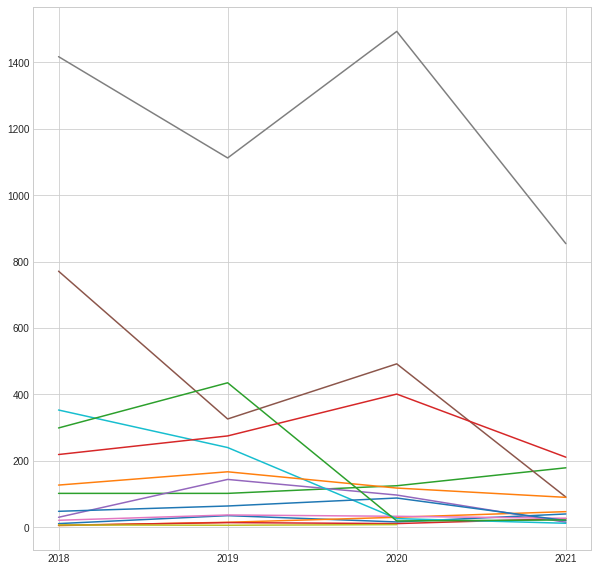

In [ ]:
plt.figure(figsize=(10, 10))
_ = plt.plot(gg_si_count)
# 수정이 필요

전반적으로 조달 건수에 대해서는 2019년도에서 2020년으로 넘어갈 때는 증가하지만, 다음 해 기준으로 급격하게 하락한다.

#### (2) 조달 금액

조달 건수와 조달 금액이 비례한다는 전제 아래, 조달 건수와 마찬가지로 동일한 과정으로 분석을 진행하였다. 일부 과정은 '(1) 조달 건수'와 동일하기에 생략하였다.

##### A. 데이터 전처리

In [ ]:
# 합(SUM)을 기준으로 Aggregate 진행

gg_si_2018_total = gg_si_2018.groupby('기관명').agg({'전체금액':'sum'})
gg_si_2019_total = gg_si_2019.groupby('기관명').agg({'전체금액':'sum'})
gg_si_2020_total = gg_si_2020.groupby('기관명').agg({'전체금액':'sum'})
gg_si_2021_total = gg_si_2021.groupby('기관명').agg({'전체금액':'sum'})

gg_si_2018_total.columns = ['2018']
gg_si_2019_total.columns = ['2019']
gg_si_2020_total.columns = ['2020']
gg_si_2021_total.columns = ['2021']

gg_si_total = pd.merge(gg_si_2018_total, gg_si_2019_total, how='outer', on='기관명')
gg_si_total = pd.merge(gg_si_total, gg_si_2020_total, how ='outer', on='기관명')
gg_si_total = pd.merge(gg_si_total, gg_si_2021_total, how = 'outer', on='기관명')

In [ ]:
# 열과 행 Transpose

gg_si_total = gg_si_total.transpose()

In [ ]:
gg_si_total.index.name = "date"
gg_si_total

기관명,강릉원주대학교치과병원,강원대학교병원,경북대학교병원,경북대학교치과병원,경상국립대학교병원,부산대학교병원,부산대학교치과병원,서울대학교병원,서울대학교치과병원,전남대학교병원,전북대학교병원,제주대학교병원,충남대학교병원,충북대학교병원
date,,,,,,,,,,,,,,
2018,2002000.0,5.791170e+08,2.437513e+09,33514000.0,5.178791e+08,1.212188e+10,168372080.0,1.093361e+10,978443570.0,1.061275e+10,3.805118e+08,1.425372e+09,4.405223e+09,4.423102e+09
2019,54245900.0,6.975030e+08,1.608086e+09,56832800.0,2.497450e+08,7.495691e+09,183105920.0,9.594467e+09,835778310.0,1.022565e+10,3.403099e+08,2.461848e+09,5.414410e+09,6.826859e+09
2020,725646670.0,2.211261e+09,2.379102e+09,43666000.0,2.402897e+09,6.679577e+09,228855120.0,1.682688e+10,46168310.0,1.935504e+09,5.362624e+08,1.390235e+09,9.951442e+08,3.902760e+09
2021,258421580.0,3.565271e+09,1.691304e+09,118302000.0,6.746820e+08,3.514527e+09,138250150.0,2.494454e+10,NaN,1.112207e+09,2.269137e+09,2.776210e+09,2.161030e+09,1.317507e+09


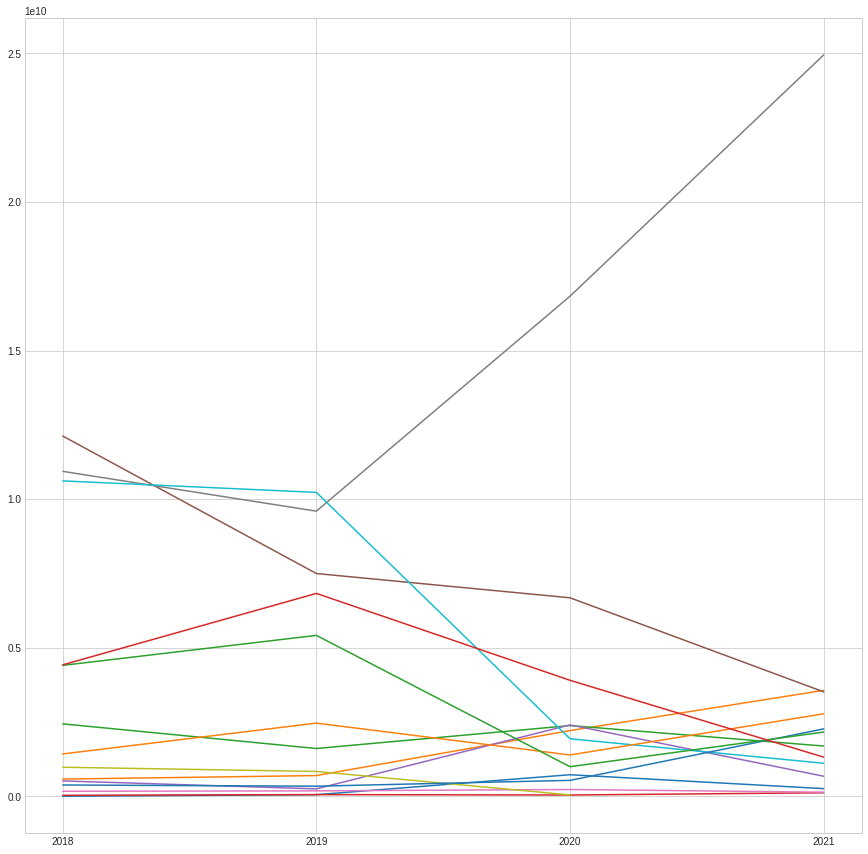

In [ ]:
plt.figure(figsize=(15, 15))
_ = plt.plot(gg_si_total)
# 수정이 필요

### 2. 중소기업자

활용데이터 : 공공기관별 중소기업자간경쟁제품 실적

#### (1) 조달 건수

##### A. 데이터 불러오기

In [ ]:
filename1 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201901.csv'
filename2 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201902.csv'
filename3 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201903.csv'
filename4 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201904.csv'
filename5 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201905.csv'
filename6 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201906.csv'
filename7 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201907.csv'
filename8 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201908.csv'
filename9 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201909.csv'
filename10 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201910.csv'
filename11 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201911.csv'
filename12 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_201912.csv'
filename13 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202101.csv'
filename14 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202102.csv'
filename15 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202103.csv'
filename16 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202104.csv'
filename17 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202105.csv'
filename18 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202106.csv'
filename19 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202107.csv'
filename20 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202108.csv'
filename21 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202109.csv'
filename22 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202110.csv'
filename23 = '/content/drive/MyDrive/조달공모전/서론데이터/02. 공공 중소기업자/공공_중소기업자_202111.csv'

for i in range (1, 13) :
    locals()['gg_sc_2019{0}'.format(i)] = pd.read_csv(locals()['filename{0}'.format(i)])

for i in range (1, 12) :
    locals()['gg_sc_2021{0}'.format(i)] = pd.read_csv(locals()['filename{0}'.format(i)])

##### B. 데이터 전처리

In [ ]:
# 전체 합 행 제거
for i in range (1, 13) :
    locals()['gg_sc_2019{0}'.format(i)] = locals()['gg_sc_2019{0}'.format(i)].drop(index=0, axis=0)

for i in range (1, 12) :
    locals()['gg_sc_2021{0}'.format(i)] = locals()['gg_sc_2021{0}'.format(i)].drop(index=0, axis=0)

In [ ]:
cond1 = "강릉원주대학교치과병원"
cond2 = "강원대학교병원"
cond3 = "경북대학교병원"
cond4 = "경상국립대학교병원"
cond5 = "부산대학교병원"
cond6 = "서울대학교병원"
cond7 = "서울대학교치과병원"
cond8 = "전남대학교병원"
cond9 = "전북대학교병원"
cond10 = "제주대학교병원"
cond11 = "충남대학교병원"
cond12 = "충북대학교병원"
cond13 = "강원도삼척의료원"
cond14 = "강원도영월의료원"
cond15 = "경기도의료원"
cond16 = "경상남도마산의료원"
cond17 = "경상북도김천의료원"
cond18 = "경상북도포항의료원"
cond19 = "대구의료원"
cond20 = "부산광역시의료원"
cond21 = "서울특별시서울의료원"
cond22 = "전라남도순천의료원"
cond23 = "전라북도남원의료원"
cond24 = "제주특별자치도서귀포의료원"
cond25 = "지방공사인천의료원"
cond26 = "진안군의료원"
cond27 = "충청남도천안의료원"
cond28 = "충청북도청주의료원"
cond29 = "충청북도충주의료원"


# 병원 및 의료원 행 추출

for i in range (1,13) :
    condition = (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond1) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond2) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond3) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond4) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond5) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond6) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond7) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond8) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond9) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond10) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond11) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond12) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond13) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond14) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond15) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond16) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond17) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond18) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond19) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond20) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond21) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond22) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond23) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond24) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond25) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond26) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond27) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond28) | (locals()['gg_sc_2019{0}'.format(i)].기관명 == cond29)
    locals()['gg_sc_2019{0}'.format(i)] = locals()['gg_sc_2019{0}'.format(i)][condition]

for i in range (1,12) :
    condition = (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond1) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond2) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond3) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond4) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond5) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond6) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond7) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond8) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond9) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond10) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond11) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond12) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond13) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond14) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond15) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond16) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond17) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond18) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond19) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond20) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond21) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond22) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond23) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond24) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond25) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond26) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond27) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond28) | (locals()['gg_sc_2021{0}'.format(i)].기관명 == cond29)
    locals()['gg_sc_2021{0}'.format(i)] = locals()['gg_sc_2021{0}'.format(i)][condition]

In [ ]:
# 기관명 인덱싱

for i in range (1, 13) :
    locals()['gg_sc_2019{0}'.format(i)] = locals()['gg_sc_2019{0}'.format(i)].set_index("기관명")

for i in range (1, 12) :
    locals()['gg_sc_2021{0}'.format(i)] = locals()['gg_sc_2021{0}'.format(i)].set_index("기관명")

In [ ]:
# 총금액, 증감관련 열 삭제

for i in range (1, 13) :
    locals()['gg_sc_2019{0}'.format(i)] = locals()['gg_sc_2019{0}'.format(i)].drop(columns=['전년총금액', '당년총금액','증감건수','증감금액'], axis=1)


for i in range (1, 12) :
    locals()['gg_sc_2021{0}'.format(i)] = locals()['gg_sc_2021{0}'.format(i)].drop(columns=['전년총금액', '당년총금액','증감건수','증감금액'], axis=1)

In [ ]:
# 열명 변경

for i in range (1, 13) :
    locals()['gg_sc_2019{0}'.format(i)].columns = ['2018-'+str(i), '2019-'+str(i)]

for i in range (1, 12) :
    locals()['gg_sc_2021{0}'.format(i)].columns = ['2020-'+str(i), '2021-'+str(i)]

In [ ]:
# 2018, 2019, 2020, 2021 표 분리

for i in range (1, 13) :
    locals()['gg_sc_2018{0}'.format(i)] = locals()['gg_sc_2019{0}'.format(i)].drop(columns=['2019-'+str(i)], axis=1)

for i in range (1, 12) :
    locals()['gg_sc_2020{0}'.format(i)] = locals()['gg_sc_2021{0}'.format(i)].drop(columns=['2021-'+str(i)], axis=1)

In [ ]:
# 데이터 하나의 표로 합치기

for i in range (2, 13) :
    gg_sc_count = pd.merge(gg_sc_count, locals()['gg_sc_2018{0}'.format(i)], how='outer', on='기관명')

for i in range (2, 13) :
    gg_sc_count = pd.merge(gg_sc_count, locals()['gg_sc_2019{0}'.format(i)], how='outer', on='기관명')

for i in range (2, 12) :
    gg_sc_count = pd.merge(gg_sc_count, locals()['gg_sc_2020{0}'.format(i)], how='outer', on='기관명')

for i in range (2, 12) :
    gg_sc_count = pd.merge(gg_sc_count, locals()['gg_sc_2021{0}'.format(i)], how='outer', on='기관명')

In [ ]:
gg_sc_count

,2018-1,2018-2_x,2018-2_y,2018-3_x,2018-4_x,2018-5_x,2018-6_x,2018-7_x,2018-8_x,2018-9_x,2018-10_x,2018-11_x,2018-12_x,2018-2_x,2019-2_x,2018-3_y,2019-3_x,2018-4_y,2019-4_x,2018-5_y,2019-5_x,2018-6_y,2019-6_x,2018-7_y,2019-7_x,2018-8_y,2019-8_x,2018-9_y,2019-9_x,2018-10_y,2019-10_x,2018-11_y,2019-11_x,2020-2_x,2020-3_x,2020-4_x,2020-5_x,2020-6_x,2020-7_x,2020-8_x,...,2018-8_y,2019-8_y,2018-9_y,2019-9_y,2018-10_y,2019-10_y,2018-11_y,2019-11_y,2018-12,2019-12,2020-2_y,2020-3_y,2020-4_y,2020-5_y,2020-6_y,2020-7_y,2020-8_y,2020-9_y,2020-10_y,2020-11_y,2020-2,2021-2,2020-3,2021-3,2020-4,2021-4,2020-5,2021-5,2020-6,2021-6,2020-7,2021-7,2020-8,2021-8,2020-9,2021-9,2020-10,2021-10,2020-11,2021-11
기관명,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
강릉원주대학교치과병원,1,3,3,7,7,9,9,9,10,14,15,16,16,3,4,7,7,7,13,9,18,9,21,9,24,10,27,14,32,15,36,16,39,3,7,7,9,9,9,10,...,10,27,14,32,15,36,16,39,16,40,3,7,7,9,9,9,10,14,15,16,3,4,7,7,7,13,9,18,9,21,9,24,10,27,14,32,15,36,16,39
강원대학교병원,1,4,4,10,13,18,26,28,32,36,40,44,46,4,6,10,11,13,12,18,13,26,19,28,25,32,33,36,36,40,41,44,47,4,10,13,18,26,28,32,...,32,33,36,36,40,41,44,47,46,56,4,10,13,18,26,28,32,36,40,44,4,6,10,11,13,12,18,13,26,19,28,25,32,33,36,36,40,41,44,47
강원도삼척의료원,0,0,0,0,1,1,1,1,3,9,9,11,11,0,2,0,2,1,2,1,2,1,2,1,2,3,2,9,2,9,2,11,2,0,0,1,1,1,1,3,...,3,2,9,2,9,2,11,2,11,2,0,0,1,1,1,1,3,9,9,11,0,2,0,2,1,2,1,2,1,2,1,2,3,2,9,2,9,2,11,2
강원도영월의료원,2,3,3,3,3,3,12,12,15,21,21,22,23,3,0,3,0,3,0,3,0,12,0,12,0,15,2,21,2,21,2,22,2,3,3,3,3,12,12,15,...,15,2,21,2,21,2,22,2,23,4,3,3,3,3,12,12,15,21,21,22,3,0,3,0,3,0,3,0,12,0,12,0,15,2,21,2,21,2,22,2
경기도의료원,4,5,5,11,13,17,21,24,26,27,28,35,51,5,130,11,143,13,196,17,203,21,211,24,215,26,218,27,220,28,227,35,230,5,11,13,17,21,24,26,...,26,218,27,220,28,227,35,230,51,256,5,11,13,17,21,24,26,27,28,35,5,130,11,143,13,196,17,203,21,211,24,215,26,218,27,220,28,227,35,230
경북대학교병원,0,9,9,10,11,11,12,27,33,34,89,102,109,9,3,10,3,11,3,11,5,12,8,27,13,33,19,34,53,89,71,102,92,9,10,11,11,12,27,33,...,33,19,34,53,89,71,102,92,109,98,9,10,11,11,12,27,33,34,89,102,9,3,10,3,11,3,11,5,12,8,27,13,33,19,34,53,89,71,102,92
경상국립대학교병원,4,5,5,8,12,15,48,95,105,108,128,148,156,5,227,8,375,12,487,15,591,48,681,95,687,105,687,108,691,128,691,148,695,5,8,12,15,48,95,105,...,105,687,108,691,128,691,148,695,156,695,5,8,12,15,48,95,105,108,128,148,5,227,8,375,12,487,15,591,48,681,95,687,105,687,108,691,128,691,148,695
경상남도마산의료원,25,61,61,64,66,66,68,71,73,73,74,123,125,61,0,64,3,66,4,66,5,68,8,71,8,73,11,73,16,74,18,123,22,61,64,66,66,68,71,73,...,73,11,73,16,74,18,123,22,125,26,61,64,66,66,68,71,73,73,74,123,61,0,64,3,66,4,66,5,68,8,71,8,73,11,73,16,74,18,123,22
경상북도김천의료원,5,7,7,11,18,18,19,20,21,23,26,28,29,7,2,11,2,18,3,18,4,19,6,20,7,21,7,23,7,26,8,28,9,7,11,18,18,19,20,21,...,21,7,23,7,26,8,28,9,29,10,7,11,18,18,19,20,21,23,26,28,7,2,11,2,18,3,18,4,19,6,20,7,21,7,23,7,26,8,28,9
